In [13]:
import numpy as np
import copy

import robo_gym_server_modules.robot_server.client as rs_client
from robo_gym.envs.simulation_wrapper import Simulation
from robo_gym_server_modules.robot_server.grpc_msgs.python import robot_server_pb2

from robo_gym.envs.mir_nav.mir_nav import Mir100NavEnv

In [14]:
class TestSim(Simulation):
    cmd = "roslaunch task_on_nav_robot_server sim_robot_server.launch"
    def __init__(self, ip=None, lower_bound_port=None, upper_bound_port=None, gui=False, **kwargs):
        Simulation.__init__(self, self.cmd, ip, lower_bound_port, upper_bound_port, gui, **kwargs)
        rs_address=self.robot_server_ip
        self.client = rs_client.Client(rs_address)

ts = TestSim(ip='localhost', gui=True)
client = ts.client

map_size = 256

rs_state_a = np.zeros([(map_size**2)*2 + 17])

ignore_start = 1
map_state_len = (map_size**2)*2
ignore_len = map_state_len + 6
ignore_index = ignore_start + ignore_len

rs_state_a[0] = map_size
rs_state_a[ignore_index] = 1
rs_state_a[ignore_index+1] = 1
rs_state_a[ignore_index+2] = 20
rs_state_a[ignore_index+3] = 0.4
rs_state_a[ignore_index+4] = 0.2
rs_state_a[ignore_index+5] = 8
rs_state_a[ignore_index+6] = 40
rs_state_a[ignore_index+7] = 45
rs_state_a[ignore_index+8] = 0.8
rs_state_a[ignore_index+9] = 0.15

state_msg = robot_server_pb2.State(state=rs_state_a)

if not client.set_state_msg(state_msg):
    raise Exception('fuuu')

rs_state = np.array(client.get_state_msg().state)
print(rs_state)

Starting new Robot Server | Tentative 1
Successfully started Robot Server at localhost:46723
[256.          -1.          -1.         ...  -2.6943233    1.86506331
   0.        ]


In [17]:
rs = copy.deepcopy(rs_state_a)
rs[ignore_index] = 0
rs[ignore_index+1] = 1
state_msg = robot_server_pb2.State(state=rs)
client.set_state_msg(state_msg)
rs_state = np.array(client.get_state_msg().state)

In [18]:
rs_state[map_state_len+1:map_state_len+4]

array([ 1.09384906,  0.89424974, -1.56987143])

In [15]:
client.send_action([0,0,np.pi/4])

True

In [32]:
rs_state = np.array(client.get_state_msg().state)

{-1.0: 62586, 0.0: 2551, 100.0: 399}
{0: 62985, 255: 2551}


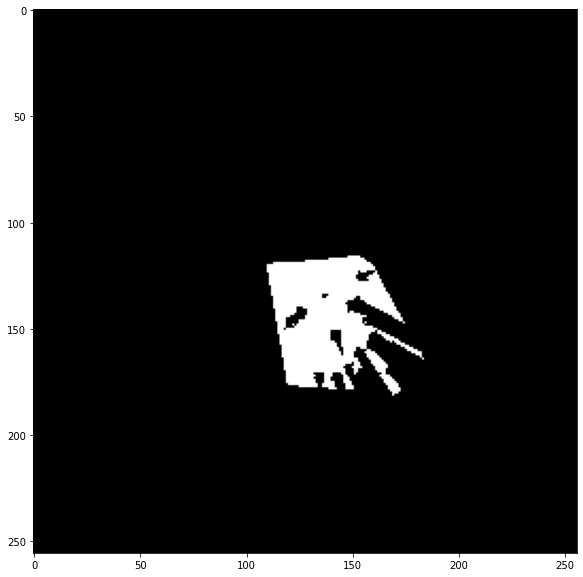

In [33]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 10,10

arr = np.array(rs_state[1:1+map_size**2])
unique, counts = np.unique(arr, return_counts=True)
print(dict(zip(unique, counts)))

arr[arr == 0] = 255
arr[arr == 100] = 0
arr[arr == -1] = 0
arr = np.array(arr, dtype=np.uint8)
unique, counts = np.unique(arr, return_counts=True)
print(dict(zip(unique, counts)))
img = arr.reshape((256,256)).T
plt.imshow(img, cmap='gray') 

{0: 62035, 255: 3501}


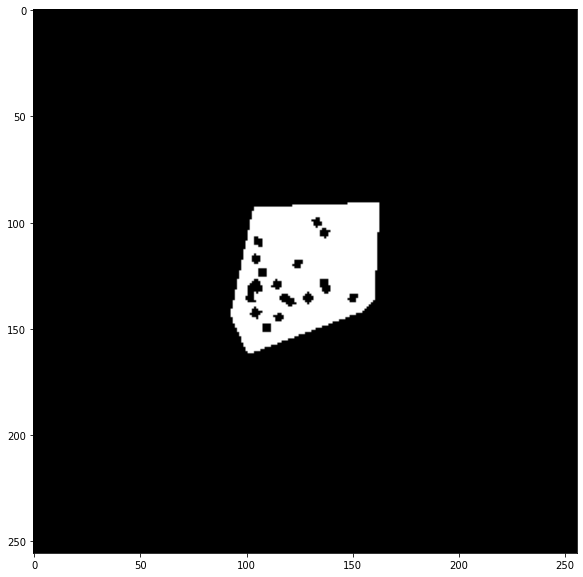

In [34]:
ar = np.array(rs_state[2+map_size**2:1+(map_size**2)*2+1],dtype=np.uint8)
unique, counts = np.unique(ar, return_counts=True)
print(dict(zip(unique, counts)))
img = ar.reshape((256,256)).T
plt.imshow(img, cmap='gray')